In [ ]:
#If you are working in a notebook or ipython environment, you may need to uncomment the line below to install the oceanum python library
#!pip install oceanum

### Import required modules

In [1]:
from oceanum.datamesh import Connector
datamesh = Connector(token='your_token')  # Replace with your token

You are using version 1.0.12 of oceanum_python which is the latest version available.
Using datamesh API version 1


### Build the query

In [2]:
query = {
    "datasource": "pskrips_atmosphere_daily_mean",
    "variables": ["U10", "V10", "T2"],
    "timefilter": {
        "type": "range",
        "times": ["2017-02-01T00:00:00+00:00", "2017-02-01T00:00:00+00:00"],
        "resolution": "native",
        "resample": "linear"
    },
    "geofilter": {
        "type": "bbox",
        "geom": [155, -78, 177, -74],
        "interp": "linear"
    },
}

### Send the query to Datamesh

In [3]:
ds = datamesh.query(query)
print(ds)

<xarray.Dataset> Size: 76kB
Dimensions:      (Time: 1, south_north: 56, west_east: 67)
Coordinates:
  * Time         (Time) datetime64[ns] 8B 2017-02-01
    XLAT         (Time, south_north, west_east) float32 15kB -77.21 ... -74.08
    XLONG        (Time, south_north, west_east) float32 15kB 148.3 ... 177.7
  * south_north  (south_north) int32 224B 101 102 103 104 ... 153 154 155 156
  * west_east    (west_east) int32 268B 18 19 20 21 22 23 ... 79 80 81 82 83 84
Data variables:
    T2           (Time, south_north, west_east) float32 15kB nan nan ... nan nan
    U10          (Time, south_north, west_east) float32 15kB nan nan ... nan nan
    V10          (Time, south_north, west_east) float32 15kB nan nan ... nan nan
Attributes:
    _coordinates:  {"t":"Time","x":"XLONG","y":"XLAT"}
    long_name:     U AT 10 M - U10
    units:         m s-1


### Plot the data

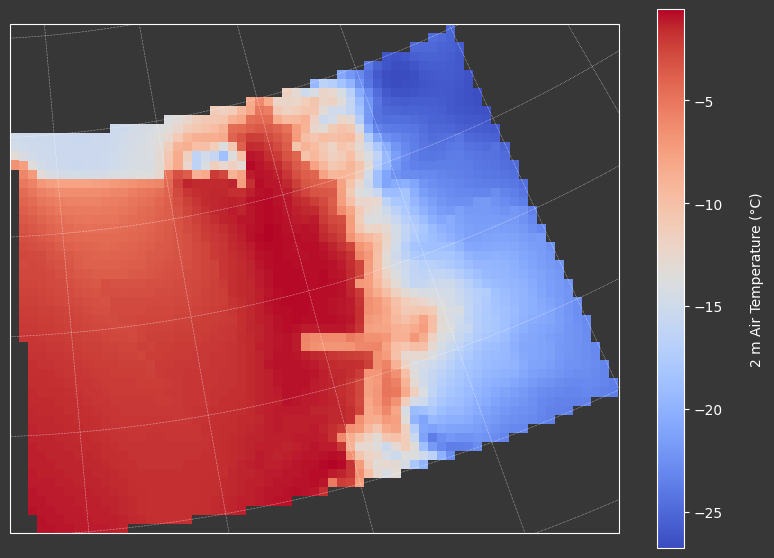

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Calculate wind speed and temperature as new variables
ds["WSPD10"] = np.hypot(ds["U10"], ds["V10"])
ds["T2_C"] = ds["T2"] - 273.15

# Dark grey background
bg = (55/255, 55/255, 56/255)

ds0 = ds.isel(Time=0)
wspd = np.ma.masked_invalid(ds0.T2_C.values)

proj_data = ccrs.PlateCarree()
proj_map  = ccrs.SouthPolarStereo()

fig = plt.figure(figsize=(8,8), facecolor=bg)
ax = plt.axes(projection=proj_map, facecolor=bg)

# Gridlines with no labels
gl = ax.gridlines(draw_labels=False, linewidth=0.4, linestyle=":", color="white")

# Plot wind speed heat map (cool-to-warm)
m = ax.pcolormesh(
    ds0.XLONG.values, ds0.XLAT.values, wspd,
    transform=proj_data,
    shading="auto",
    cmap="coolwarm"
)

# Colorbar styling
cbar = plt.colorbar(m, ax=ax, shrink=0.7)
cbar.ax.set_facecolor(bg)
cbar.outline.set_edgecolor("white")
cbar.set_label("2 m Air Temperature (°C)", color="white", rotation=90, labelpad=20)
cbar.ax.yaxis.set_tick_params(color="white")
plt.setp(cbar.ax.get_yticklabels(), color="white")

# Make spines white
for spine in ax.spines.values():
    spine.set_edgecolor("white")

plt.tight_layout()
plt.show()